### 1.Inspiration /Problem Statement:The goal is to use best model for predicting whether the customer will churn or not.

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
import plotly.express as px
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
import time
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

### Setting (CWD) Current Working Directory

In [2]:
import os
#Setting current working directory
os.chdir("/Users/Zahed/Telecom_customer_churn")

### 2. Data Loading and Description

#### Importing Dataset

In [3]:
df=pd.read_csv("Telecom_customer_churn.csv")
pd.set_option('display.max_columns',None)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

#### Dimensionality Check

In [4]:
df.shape

(7043, 21)

##### Observation:The dataset consist of 7043 observations of 21 columns.

In [5]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df=df

#### Variables/Features of the Dataset

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 3.Preprocessing data

* Checking Missing Values
* Checking class imbalancement
* Displaying data types and their Unique values.
* Dropping insignigicant columns with less or no usefull data in it
* Transforming Data/Converting Categorical Columns into Numerical Column

#### Checking Missing Values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Observation:There are no Missing Values in any of the columns in dataset

#### Data Description

In [9]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [10]:
#Get the Count of Number of Customers who stayed and who left the telecom company
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
# Visualization of Count of Number of Customers who stayed and who left the telecom company
sn.countplot(df['Churn'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

In [12]:
#Lets say that by default if the value of the attrition is said to be 'NO' how much woud be the Model Accuracy percentage 
round((5174-1869)/5174*100)

64

##### Observation:If we were to assume the attrition value to be NO all the time we would be 64 Accurate according to the above calculation,
#### So if We where to build a Model we Need to build a Model with Model Accuracy percentage higher than 64 %

In [13]:
# print all of the data types and their Unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)+ ':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------------------')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
5442-BHQNG    1
5383-MMTWC    1
0487-VVUVK    1
5135-RDDQL    1
4194-FJARJ    1
             ..
7978-DKUQH    1
1907-UBQFC    1
6229-UOLQL    1
3761-FLYZI    1
8329-GWVPJ    1
Name: customerID, Length: 7043, dtype: int64
---------------------------------------------------------------------------------------------
gender:['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------------------------------------------------------------------
Partner:['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------------------------------------------------------------------
Dependents:['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------------------------------------------------------------------
PhoneService:['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dty

In [14]:
# Changing the data type of "TotalCharges" and "tenure" to float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for i in feature_list:
        df[i] = df[i].astype(float)
        return df

feature_to_float(['tenure'], df)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No     1.0   
1     5575-GNVDE    Male              0      No         No    34.0   
2     3668-QPYBK    Male              0      No         No     2.0   
3     7795-CFOCW    Male              0      No         No    45.0   
4     9237-HQITU  Female              0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes    24.0   
7039  2234-XADUH  Female              0     Yes        Yes    72.0   
7040  4801-JZAZL  Female              0     Yes        Yes    11.0   
7041  8361-LTMKD    Male              1     Yes         No     4.0   
7042  3186-AJIEK    Male              0      No         No    66.0   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       1889.50    No  
2              53.85        108.15   Yes  
3              42.30       1840.75    No  
4              70.70        151.65   Yes  
...              ...           ...   ...  
7038           84.80       1990.50    No  
7039          103.20       7362.90    No  
7040           29.60        346.45    No  
7041           74.40        306.60   Yes  
7042          105.65       6844.50    No  

[7043 rows x 21 columns]

In [15]:
#changing the data values of the PaymentMethod Column for a better readablity
payment_column = {'Electronic check':'E-Check', 'Mailed check':'Mailed check', 'Bank transfer (automatic)':'Bank Transfer',
 'Credit card (automatic)':'Credit Card'}
df['PaymentMethod'].replace(payment_column, inplace=True)

In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
# fill the missing values for the numerical terms-mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Observation: We have dealt with the missing values in TotalCharges Column.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

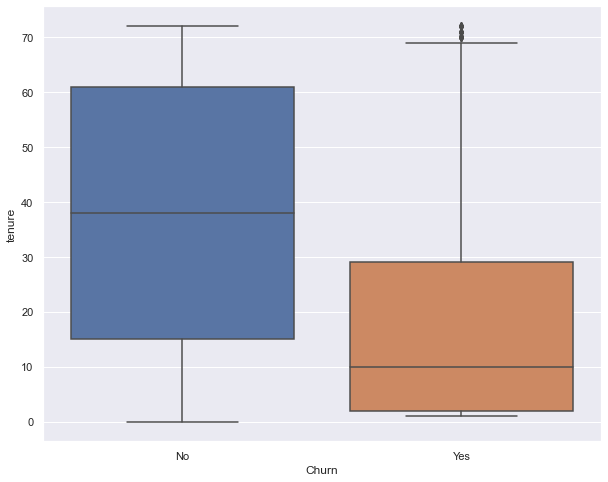

In [20]:
# tenure vs Churn Analysis
plt.figure(figsize=(10,8))
sn.boxplot(x='Churn',y='tenure',data=df)

#### Observation: The plot shows a class imbalance of the data between churners and non-churners.

In [21]:
#Create a function to generate Boxplots.
plots = {1: [111],2: [121,122],3: [131,132,133],4: [221,222,223,224],5: [231,232,233,234,235],
         6: [231,232,233,234,235,236]}

def boxplot(x,y,df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sn.boxplot(x=x,y=j,data=df[[x,j]],palette="viridis",linewidth=1)
        ax.set_title(j)
    
    return plt.show()

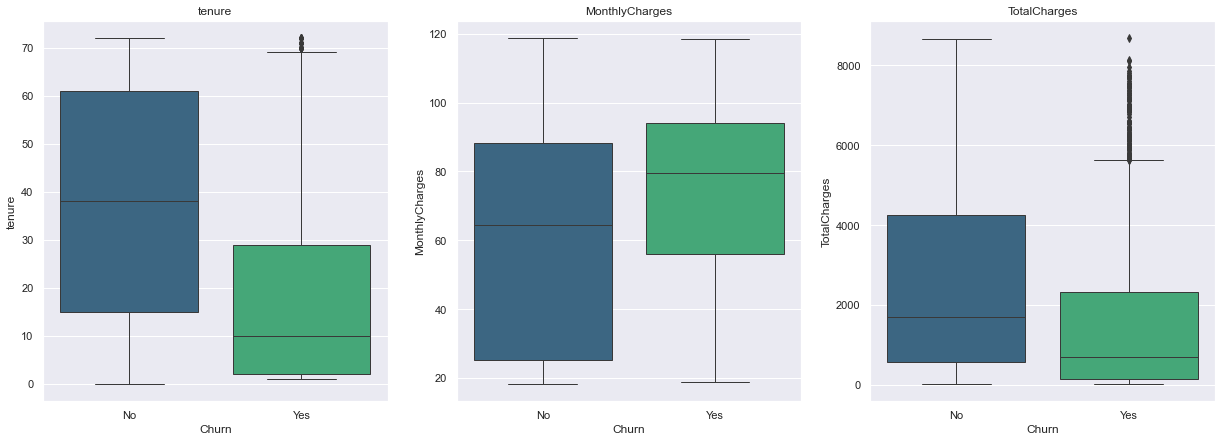

In [22]:
#Generate Boxplots for Tenure, MonthlyCharges & TotalCharges.
boxplot("Churn",['tenure', 'MonthlyCharges','TotalCharges'],df)

#### Plot Observations:

* Churning customers have much lower tenure with a median of about 10 Months compared to a median of non-churners of nearly 38 Months.
* Churning customers have higher monthly charges with a median of about 80 Dollars and much lower interquartile range compared to that of non-churners (median of about 65 Dollars approximately).
* TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual customer basis.

In [23]:
def Countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns,7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sn.countplot(x=j,hue=x,data=df[[x,j]],palette="viridis",linewidth=1,alpha=0.8)
        ax.set_title(j)
    
    return plt.show()

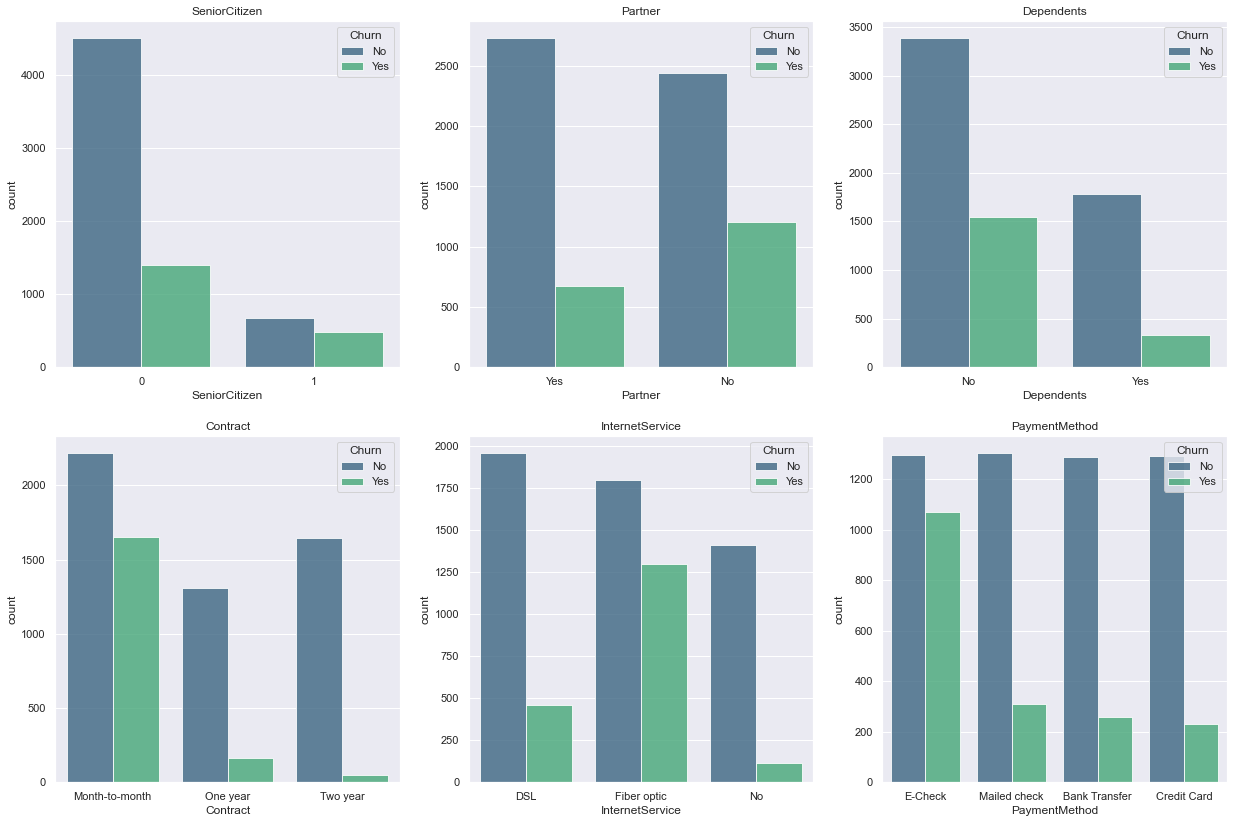

In [24]:
#Generate Countplots for Tenure, MonthlyCharges & TotalCharges.
Countplot('Churn',['SeniorCitizen', 'Partner', 'Dependents','Contract','InternetService','PaymentMethod'],df)

#### Plot Observations:

* Senior citizens churn rate is much higher than non-senior churn rate.
* Churn rate for month-to-month contracts much higher that for other contract durations.
* Moderately higher churn rate for customers without partners.
* Much higher churn rate for customers without children.
* Payment method electronic check shows much higher churn rate than other payment methods.
* Customers with InternetService fiber optic as part of their contract have much higher churn rate.

### Checking Outliers in Numerical Features

In [25]:
#Check Outliers by Applying IQR method checking whether the outliers are way outside the borders
Numerical_Features = ['tenure', 'MonthlyCharges','TotalCharges']
df_num = df[Numerical_Features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

* No outliers in numerical features detected with the IQR method — No Adjustments Needed.

### Feature Engineering

#### Feature Selection / Generation

In [26]:
#Droopping insignificant column
df = df.drop(columns="customerID")

In [27]:
# Generate new features "Number AdditionalServices" by adding the number of add-on services consumed.
df["Number_AdditionalServices"] = (df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No     1.0           No   
1       Male              0      No         No    34.0          Yes   
2       Male              0      No         No     2.0          Yes   
3       Male              0      No         No    45.0           No   
4     Female              0      No         No     2.0          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes    24.0          Yes   
7039  Female              0     Yes        Yes    72.0          Yes   
7040  Female              0     Yes        Yes    11.0           No   
7041    Male              1     Yes         No     4.0          Yes   
7042    Male              0      No         No    66.0          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges Churn  \
0                 Yes        E-Check           29.85         29.85    No   
1                  No   Mailed check           56.95       1889.50    No   
2                 Yes   Mailed check           53.85        108.15   Yes   
3                  No  Bank Transfer           42.30       1840.75    No   
4                 Yes        E-Check           70.70        151.65   Yes   
...               ...            ...             ...           ...   ...   
7038              Yes   Mailed check           84.80       1990.50    No   
7039              Yes    Credit Card          103.20       7362.90    No   
7040              Yes        E-Check           29.60        346.45    No   
7041              Yes   Mailed check           74.40        306.60   Yes   
7042              Yes  Bank Transfer          105.65       6844.50    No   

      Number_AdditionalServices  
0                             1  
1                             2  
2                             2  
3                             3  
4                             0  
...                         ...  
7038                          5  
7039                          4  
7040                          1  
7041                          0  
7042                          5  

[7043 rows x 21 c

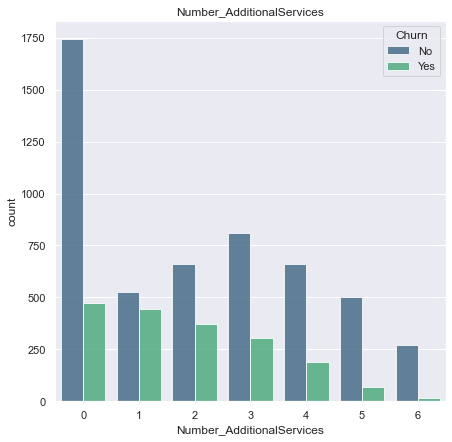

In [28]:
#Countplot for the New Feature
Countplot('Churn', ['Number_AdditionalServices'], df)

#### Plot Observation:
* The countplot shows a very high churn rate for customers that have 1 additional service.
* Customers with a very high number of additional services do have a low churn rate.

In [29]:
#Label Encoding  for identified columns.
feature_le = ['gender', 'Partner', 'Dependents','Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features,df):
    for i in features:
        df[i] = df[i].map({'Yes':1, 'No':0})
    return

label_encoding(['Partner', 'Dependents','Churn', 'PhoneService', 'PaperlessBilling'],df)
df['gender'] = df['gender'].map({'Female':1, 'Male':0})

In [30]:
#One-Hot Encoding  for identified columns.
feature_ohe = [ 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod', 'Number_AdditionalServices']

df = pd.get_dummies(df,columns = feature_ohe)

In [31]:
#Min-Max Scaling  for identified columns.
from sklearn.preprocessing import MinMaxScaler
feature_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_feature_mms = pd.DataFrame(df,columns = feature_mms)
df_remaining_features = df.drop(columns = feature_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_feature_mms)
df_rescaled_features = pd.DataFrame(rescaled_features,columns = feature_mms,index = df_remaining_features.index)

pd.concat([df_remaining_features, df_rescaled_features], axis=1)

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0          1              0        1           0             0   
1          0              0        0           0             1   
2          0              0        0           0             1   
3          0              0        0           0             0   
4          1              0        0           0             1   
...      ...            ...      ...         ...           ...   
7038       0              0        1           1             1   
7039       1              0        1           1             1   
7040       1              0        1           1             0   
7041       0              1        1           0             1   
7042       0              0        0           0             1   

      PaperlessBilling  Churn  MultipleLines_No  \
0                    1      0                 0   
1                    0      0                 1   
2                    1      1                 1   
3                    0      0                 0   
4                    1      1                 1   
...                ...    ...               ...   
7038                 1      0                 0   
7039                 1      0                 0   
7040                 1      0                 0   
7041                 1      1                 0   
7042                 1      0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                  1                  0                    1   
1                                  0                  0                    1   
2                                  0                  0                    1   
3                                  1                  0                    1   
4                                  0                  0                    0   
...                              ...                ...                  ...   
7038                               0                  1                    1   
7039                               0                  1                    0   
7040                               1                  0                    1   
7041                               0                  1                    0   
7042                               0                  0                    0   

      InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                               0                   0                  1   
1                               0                   0                  0   
2                               0                   0                  0   
3                               0                   0                  0   
4                               1                   0                  1   
...                           ...                 ...                ...   
7038                            0                   0                  0   
7039                            1                   0                  1   
7040                            0                   0                  0   
7041                            1                   0                  1   
7042                            1                   0                  0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                      0                   0                0   
1                                      0                   1                1   
2                                      0                   1                0   
3                                      0                   1                1   
4                                      0                   0                1   
...                                  ...                 ...              ...   
7038                                   0                   1                1   
7039                                   0                   0                0 

<AxesSubplot:>

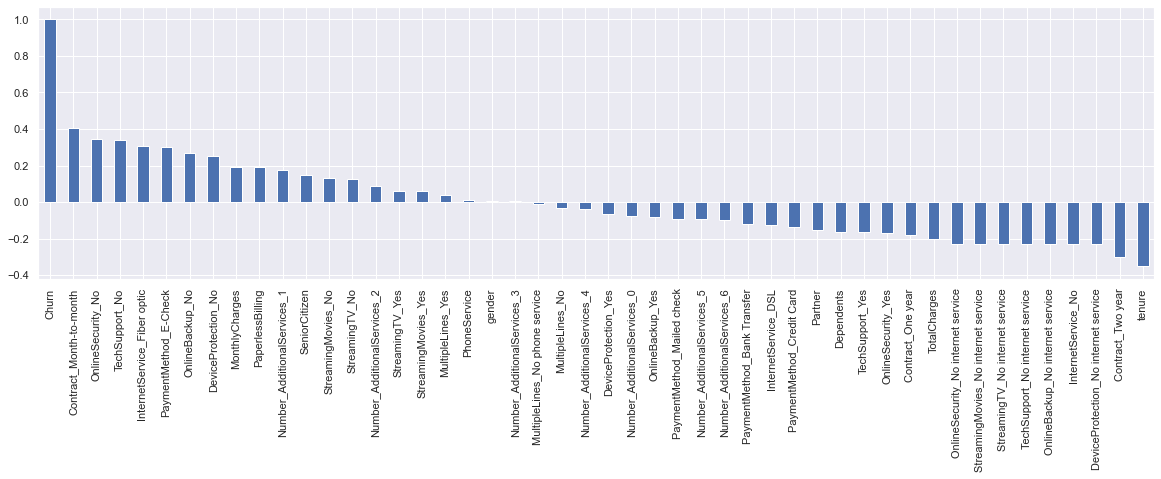

In [32]:
# Co-relation Analysis
plt.figure(figsize=(20,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

### Train-Test-Split 

In [33]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X1 = df.drop('Churn',axis=1)
X = X1.values
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Model Evaluation Metrics
* For performance assessment of the chosen models, various metrics are used:
* Feature weights: Indicates the top features used by the model to generate the predictions
* Confusion matrix: Shows a grid of true and false predictions compared to the actual values
* Accuracy score: Shows the overall accuracy of the model for training set and test set
* ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)
* AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve
* Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance
* F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.
* AUC (for PRC): Measures the overall separability between classes of the model related to the Precision-Recall curve

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix,precision_score,recall_score

In [35]:
# Define a function that plots feature weights for a classfier.
def feature_weights(X_df,classifier,classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    top_weights_selected.plot(kind="bar")
    
    return print("")

In [36]:
#Define a function that plots the confusion matrix for a classifier and the train and test accuracy

def confusion_matrix_plot(X_train,y_train,X_test,y_test,classifier,y_pred,classifier_name):
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier,X_test,y_test,display_labels=["No Churn","Churn"],cmap=plt.cm.Blues,normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier,X_test,y_test,display_labels=["No Churn","Churn"],cmap=plt.cm.Blues,normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test,y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train,y_train)} (as comparison)')
    return print("")

In [37]:
#Define a function that  plots ROC Curve & AUC Curve

def roc_curve_auc_score(X_test,y_test,y_pred_probabilities,classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr, thresholds = roc_curve(y_test,y_pred_prob)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score(ROC): {roc_auc_score(y_test,y_pred_prob)}\n')
    

In [38]:
#Define a function that plots the precision-recall curve and the F1 Score and AUC score
def precision_recall_curve_and_scores(X_test,y_test,y_pred,y_pred_probabilities,classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision,recall,thresholds = precision_recall_curve(y_test,y_pred_prob)
    
    plt.plot(recall, precision,label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result,auc_score_result =f1_score(y_test,y_pred), auc(recall,precision)
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')
    

### Model Selection, Training, Prediction and Assessment

* In the beginning we will test out several models and measure their performance by several metrics. Those models will be optimized in a later step by tuning their hyperparameters. The models used include:
* K Nearest Neighbors — fast, simple and instance-based
* Logistic Regression — fast and linear model
* Random Forest — slower but accurate ensemble model based on decision trees
* Support Vector Machines — slower but accurate model used here in the non-linear form


### K Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the KNN classifier based on the training set.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make prediction 
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

Accuracy Score Test: 0.7771469127040455
Accuracy Score Train: 0.8281860134895279 (as comparison)



AUC Score(ROC): 0.7766013332367221



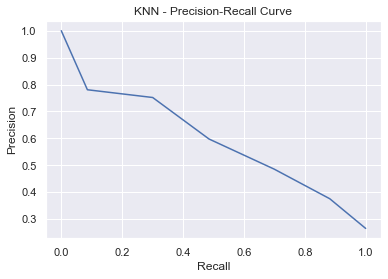

F1 Score: 0.5355029585798817 
AUC Score (PR): 0.5977003111431818



In [40]:
# plot model evaluation.
confusion_matrix_plot(X_train,y_train,X_test,y_test,knn,y_pred_knn, 'KNN')
roc_curve_auc_score(X_test,y_test,y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_knn_prob, 'KNN')

In [41]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the LogisticRegression based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make prediction 
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

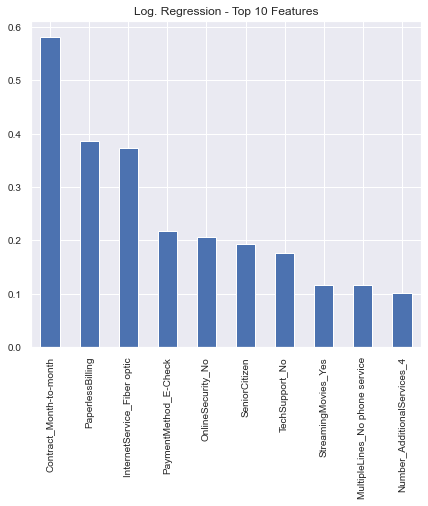

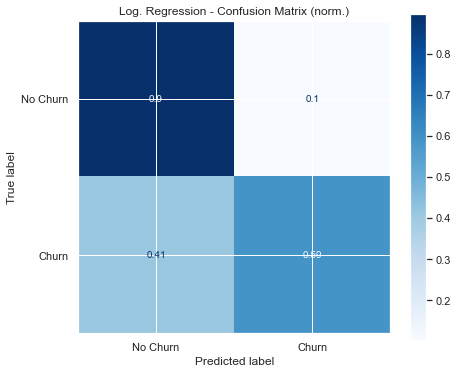

Accuracy Score Test: 0.8168914123491838
Accuracy Score Train: 0.8061767838125665 (as comparison)



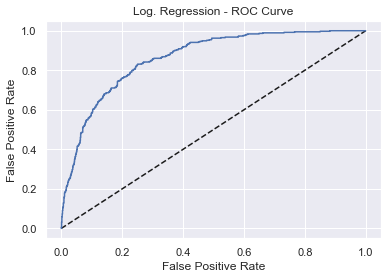

AUC Score(ROC): 0.8627105178713759



F1 Score: 0.6314285714285715 
AUC Score (PR): 0.6810598739663238



In [42]:
# plot model evaluation.
feature_weights(X1,logreg, 'Log. Regression')
confusion_matrix_plot(X_train,y_train,X_test,y_test,logreg,y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test,y_test,y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test,y_test,y_pred_logreg,y_pred_logreg_prob, 'Log. Regression')

### Random Forest

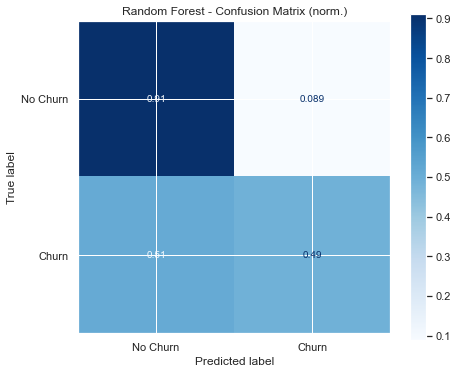

Accuracy Score Test: 0.7991483321504613
Accuracy Score Train: 0.9984025559105432 (as comparison)



AUC Score(ROC): 0.838561129110727



F1 Score: 0.5625965996908809 
AUC Score (PR): 0.6472635662573224



In [43]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the RandomForestClassifier based on the training set.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make prediction 
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# plot model evaluation.
confusion_matrix_plot(X_train,y_train,X_test,y_test,rf,y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test,y_test,y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test,y_test,y_pred_rf,y_pred_rf_prob, 'Random Forest')

### Support Vector Machine

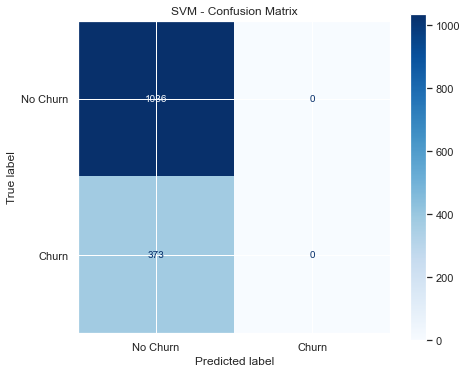

Accuracy Score Test: 0.7352732434350603
Accuracy Score Train: 0.7344692935747249 (as comparison)



AUC Score(ROC): 0.8156383595391639



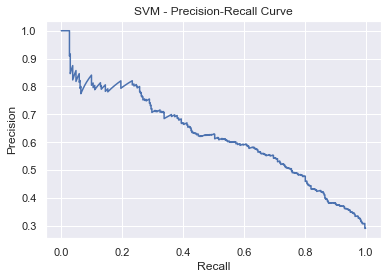

F1 Score: 0.0 
AUC Score (PR): 0.623424880399684



In [44]:
from sklearn.svm import SVC

# Instantiate and train the SVC Model based on the training set.
support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train, y_train)

# Make prediction 
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# plot model evaluation.
confusion_matrix_plot(X_train,y_train,X_test,y_test,support_vector_m,y_pred_svm, 'SVM')
roc_curve_auc_score(X_test,y_test,y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test,y_test,y_pred_svm,y_pred_svm_prob, 'SVM')

### Hyperparameter Tuning/Model Improvement

### K Nearest Neighbors (Tuned)

In [45]:
from sklearn.model_selection import GridSearchCV

# Define Parameter Grid Search and Instantiate and train the KNN classifier based on the training set.
param_grid = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Make prediction 
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:',knn_cv.best_params_,'\n')

KNN best number of neighbors: {'n_neighbors': 21} 



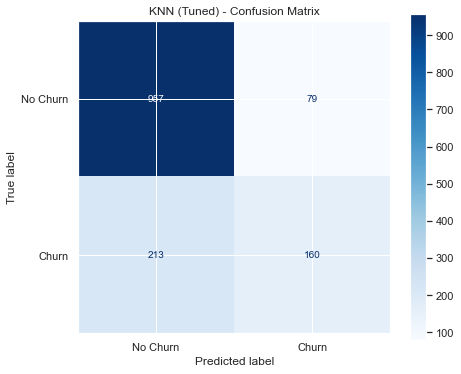

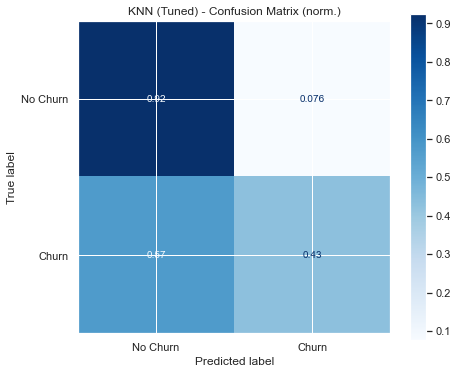

Accuracy Score Test: 0.7927608232789212
Accuracy Score Train: 0.7948171813986511 (as comparison)



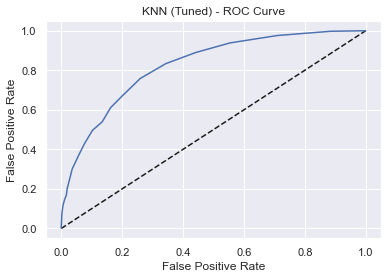

AUC Score(ROC): 0.8238054695829494



F1 Score: 0.522875816993464 
AUC Score (PR): 0.6407100192320695



In [46]:
# plot model evaluation.
confusion_matrix_plot(X_train,y_train,X_test,y_test,knn_cv,y_pred_knn_tuned, 'KNN (Tuned)')
roc_curve_auc_score(X_test,y_test,y_pred_knn_tuned_prob, 'KNN (Tuned)')
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn_tuned,y_pred_knn_tuned_prob, 'KNN (Tuned)')

### Logistic Regression (Tuned)

In [47]:
# Define Parameter Grid Search and Instantiate and train the LogesticRegression and train Model.
param_grid_L1 = {'penalty': ['l1','l2'],'C': np.arange(.1,5, .1)}
logreg_tuned = LogisticRegression(solver = 'saga', max_iter=100)
logreg_tuned_gs = GridSearchCV(logreg_tuned,param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make prediction 
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)


print('Logestic Regression - Best Parameters:',logreg_tuned_gs.best_params_,'\n')

Logestic Regression - Best Parameters: {'C': 0.1, 'penalty': 'l1'} 



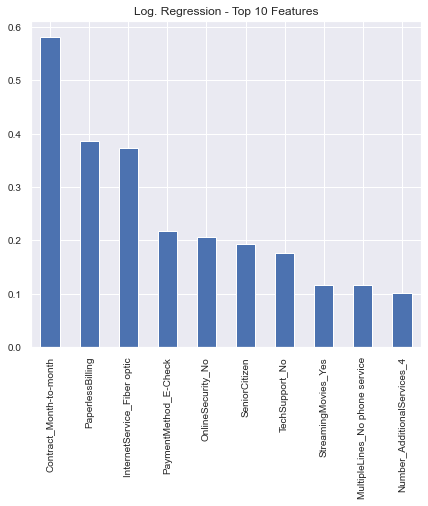

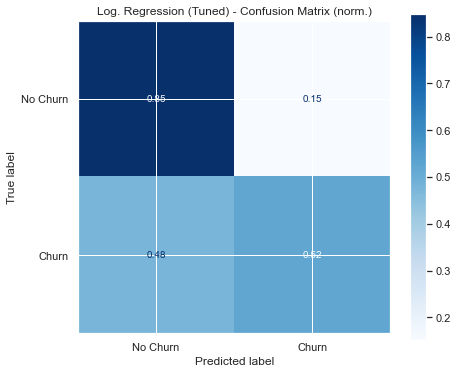

Accuracy Score Test: 0.7622427253371186
Accuracy Score Train: 0.7667731629392971 (as comparison)



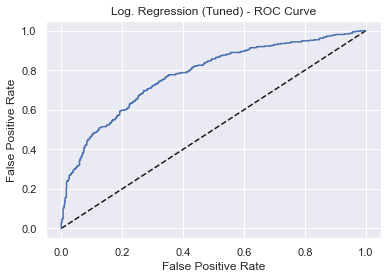

AUC Score(ROC): 0.7762752699079777



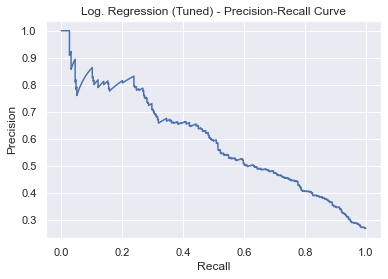

F1 Score: 0.5379310344827587 
AUC Score (PR): 0.5937387530376894



In [48]:
# plot model evaluation.
feature_weights(X1,logreg, 'Log. Regression')
confusion_matrix_plot(X_train,y_train,X_test,y_test,logreg_tuned_gs,y_pred_logreg_tuned, 'Log. Regression (Tuned)')
roc_curve_auc_score(X_test,y_test,y_pred_logreg_tuned_prob, 'Log. Regression (Tuned)')
precision_recall_curve_and_scores(X_test,y_test,y_pred_logreg_tuned,y_pred_logreg_tuned_prob, 'Log. Regression (Tuned)')

### Random Forest (Tuned)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Define Parameter Grid Search and Instantiate and train the RandomizedSearch and train Model.
param_grid_rf = {'max_features': ['auto','sqrt'],
                 'n_estimators': np.arange(10,2000, 10),
                 'max_depth' : np.arange(10,200, 10),
                 'criterion': ['gini','entropy'],
                 'bootstrap': [True,False]}


rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf,param_distributions=param_grid_rf,cv=5,verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make prediction 
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)


print('Random Forest - Best Parameters:',rf_random_grid.best_params_)

Random Forest - Best Parameters: {'n_estimators': 1360, 'max_features': 'sqrt', 'max_depth': 150, 'criterion': 'entropy', 'bootstrap': True}


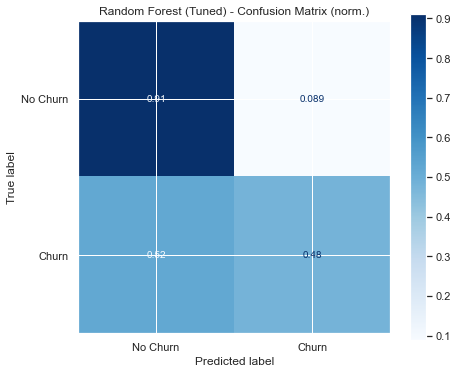

Accuracy Score Test: 0.7970191625266146
Accuracy Score Train: 0.9985800496982605 (as comparison)



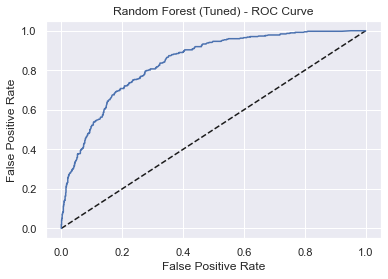

AUC Score(ROC): 0.8399171385096318



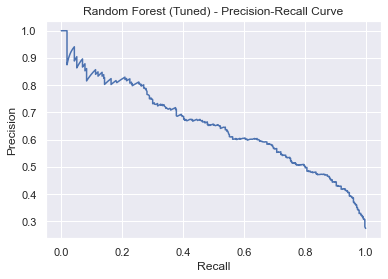

F1 Score: 0.5559006211180124 
AUC Score (PR): 0.6514065948401915



In [50]:
# plot model evaluation.
confusion_matrix_plot(X_train,y_train,X_test,y_test,rf_random_grid,y_pred_rf_tuned, 'Random Forest (Tuned)')
roc_curve_auc_score(X_test,y_test,y_pred_rf_tuned_prob, 'Random Forest (Tuned)')
precision_recall_curve_and_scores(X_test,y_test,y_pred_rf_tuned,y_pred_rf_tuned_prob, 'Random Forest (Tuned)')

### Summary


### Model Summary
* Looking at model results, the best accuracy on the test set is achieved by the Random Forest with 0,7998. Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best score on jointly precision and recall. This would also be the Random Forest with a F1 score of 0.5634.
* Given the scores of the best performing models, it can be observed that F1 scores are not much above 50%. Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more business value.

In [51]:
import pickle
  
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(rf_random_grid)
  
# Load the pickled model
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded pickled model to make predictions
Final_mod_from_pickle.predict(X)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)